### Problem Statement

Banks receive thousands of loan applications every month. Assessing whether an applicant is eligible for a loan is a critical decision that directly affects financial risk. Traditionally, this evaluation depends on factors like income, age, loan amount, credit score, marital status, education level, and gender.

The objective of this project is to develop a **predictive model using Logistic Regression** that can automatically determine whether a loan application should be approved or not, based on the applicant’s profile.

By analyzing historical loan approval data, the model should learn patterns and relationships between applicant features (such as `Age`, `Income`, `LoanAmount`, `CreditScore`, `Married`, `Education`, and `Gender`) and the target variable `Approved`. Once trained, this model can be used to predict loan approval outcomes for new applicants.

### Goals

1. Understand and preprocess mixed-type data (numerical + categorical).
2. Build a Logistic Regression pipeline using Scikit-learn to automate preprocessing and modeling.
3. Evaluate the model using accuracy, confusion matrix, and classification report metrics.
4. Interpret the model’s coefficients to understand which factors most influence loan approval decisions.

### Expected Outcome

A well-performing Logistic Regression model capable of classifying whether a loan will be **approved (1)** or **not approved (0)**, providing the bank with a data-driven tool for faster and more consistent loan evaluations.


**1) Import Libraries**

In [68]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [105]:
df = pd.read_csv("/content/bank_loan_data_5000.csv")

In [4]:
df.head()

,Age,Income,LoanAmount,CreditScore,Married,Education,Gender,Approved
0,59,82889,27000,498,Yes,Non-Graduate,Female,1
1,49,74192,42232,476,Yes,Graduate,Female,0
2,35,94301,15206,478,Yes,Non-Graduate,Male,1
3,63,39785,8196,476,Yes,Non-Graduate,Female,1
4,28,45879,5265,376,No,Non-Graduate,Male,1


In [120]:
new_df = df.copy()

In [6]:
new_df

,Age,Income,LoanAmount,CreditScore,Married,Education,Gender,Approved
0,59,82889,27000,498,Yes,Non-Graduate,Female,1
1,49,74192,42232,476,Yes,Graduate,Female,0
2,35,94301,15206,478,Yes,Non-Graduate,Male,1
3,63,39785,8196,476,Yes,Non-Graduate,Female,1
4,28,45879,5265,376,No,Non-Graduate,Male,1
...,...,...,...,...,...,...,...,...
4995,33,53420,7193,454,Yes,Graduate,Female,1
4996,65,51544,11792,466,Yes,Non-Graduate,Female,0
4997,37,38494,14317,378,No,Non-Graduate,Female,0
4998,57,44733,21014,503,Yes,Non-Graduate,Male,0


**2) Exploratory Data Analysis**

In [7]:
print("\n--- Missing Values ---\n", df.isnull().sum())
print("\n--- Data Types ---\n", df.dtypes)
print("\n--- Descriptive Statistics ---\n", df.describe())


--- Missing Values ---
 Age            0
Income         0
LoanAmount     0
CreditScore    0
Married        0
Education      0
Gender         0
Approved       0
dtype: int64

--- Data Types ---
 Age             int64
Income          int64
LoanAmount      int64
CreditScore     int64
Married        object
Education      object
Gender         object
Approved        int64
dtype: object

--- Descriptive Statistics ---
               Age         Income    LoanAmount  CreditScore     Approved
count  5000.00000    5000.000000   5000.000000  5000.000000  5000.000000
mean     43.13460   44919.021600  15734.187200   406.030000     0.466800
std      12.89329   15840.944126   8858.065278    55.095345     0.498946
min      21.00000   20000.000000   2470.000000   300.000000     0.000000
25%      32.00000   33942.250000   9190.000000   367.000000     0.000000
50%      43.00000   41369.500000  14251.000000   403.000000     0.000000
75%      54.00000   52008.000000  20317.000000   441.000000     1.00000

**3) Univariate And Bivariate Analysis**

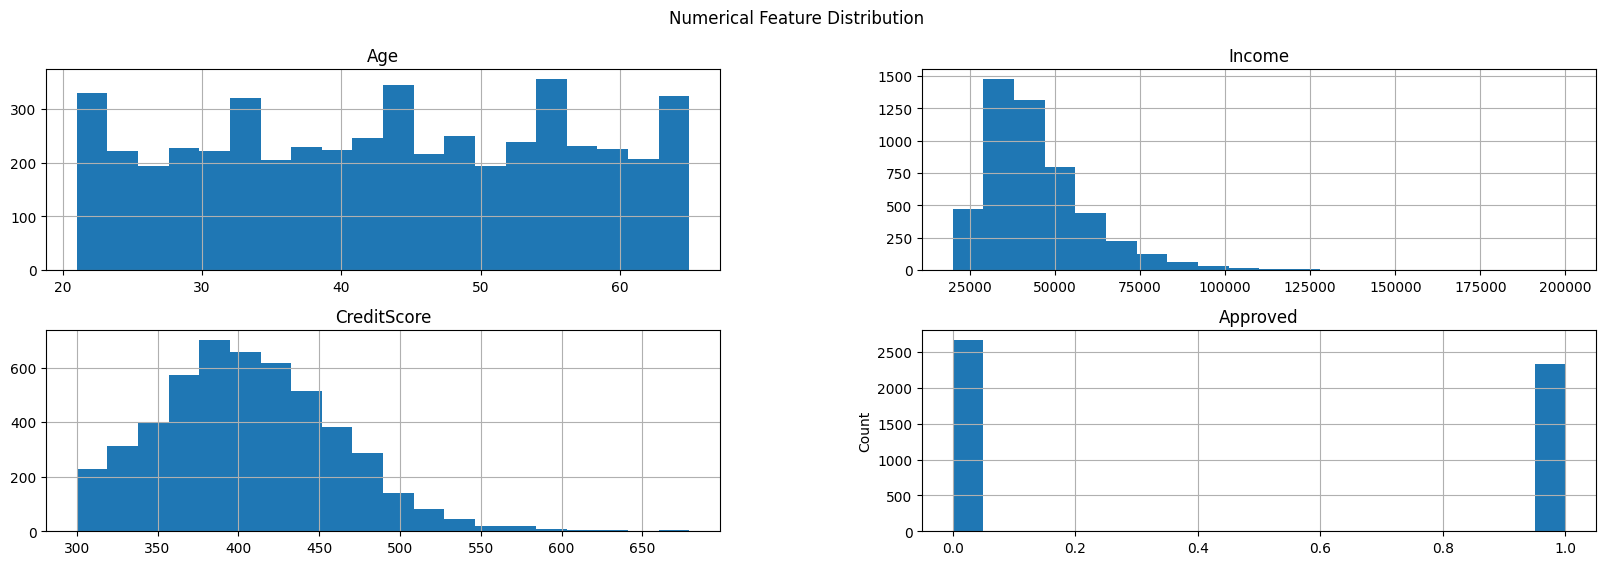

In [16]:
# Univariate Analysis on Numerical Columns
num_cols = ["Age", "Income", "CreditScore", "Approved"]
df[num_cols].hist(figsize= (20, 6), bins = 20)
plt.ylabel("Count")
plt.suptitle("Numerical Feature Distribution")
plt.show()


**Observations:**


*   Age is not a powerful predictor, There is no unique pattern for age to, which can help us determine whether age affects loan approvals or not.

*  People between the income range of 25000 - 50000, are more when compared to any another income group.

* Credit score is normally distributed.



/tmp/ipython-input-1112884813.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=cols, data = new_df, palette = "Set2")


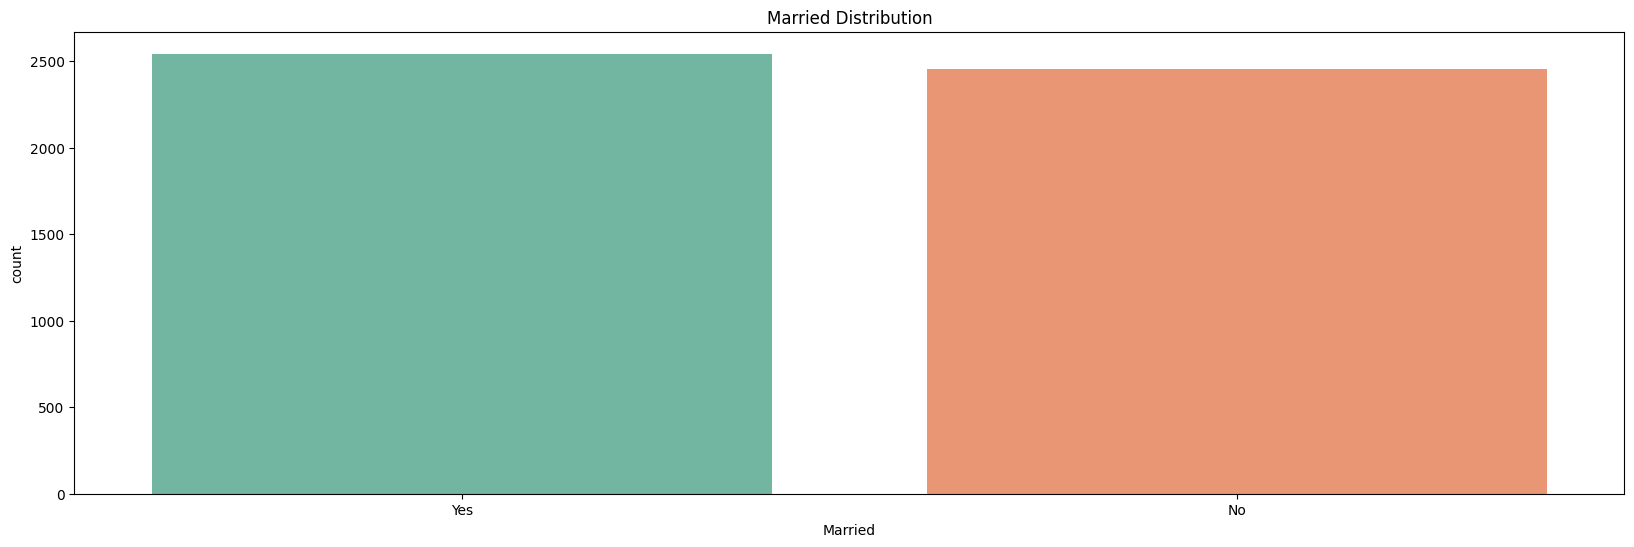

/tmp/ipython-input-1112884813.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=cols, data = new_df, palette = "Set2")


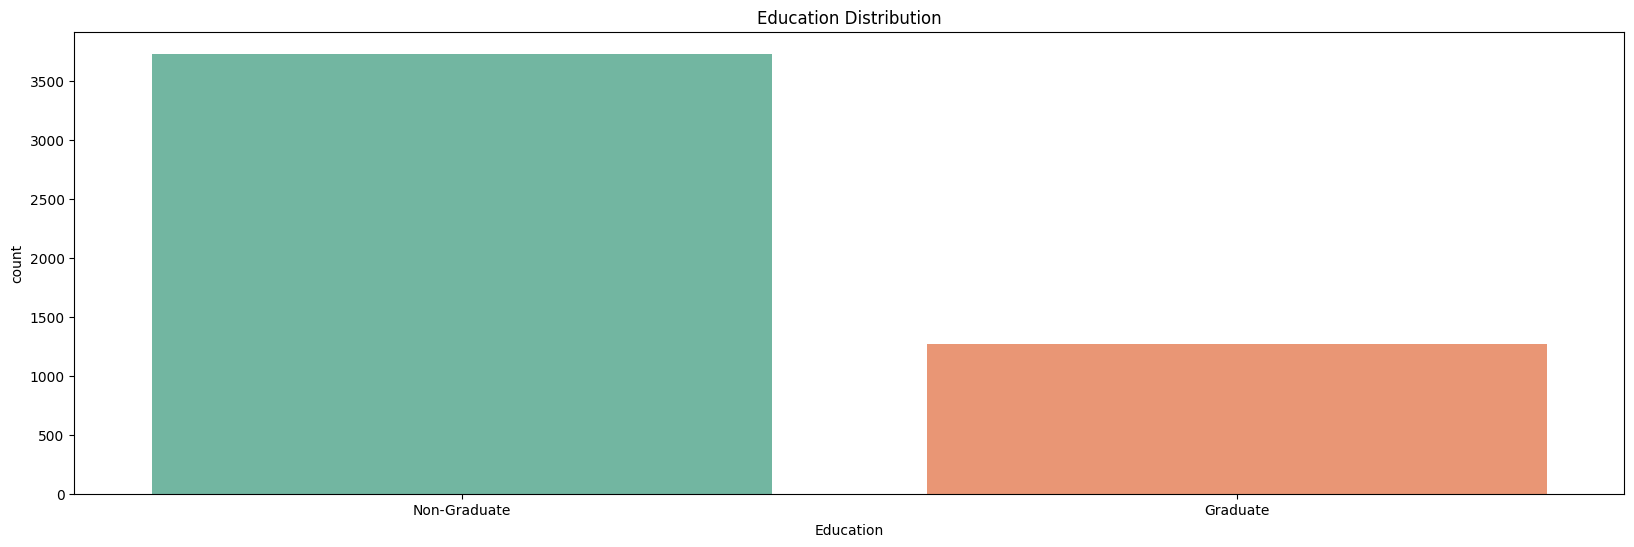

/tmp/ipython-input-1112884813.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=cols, data = new_df, palette = "Set2")


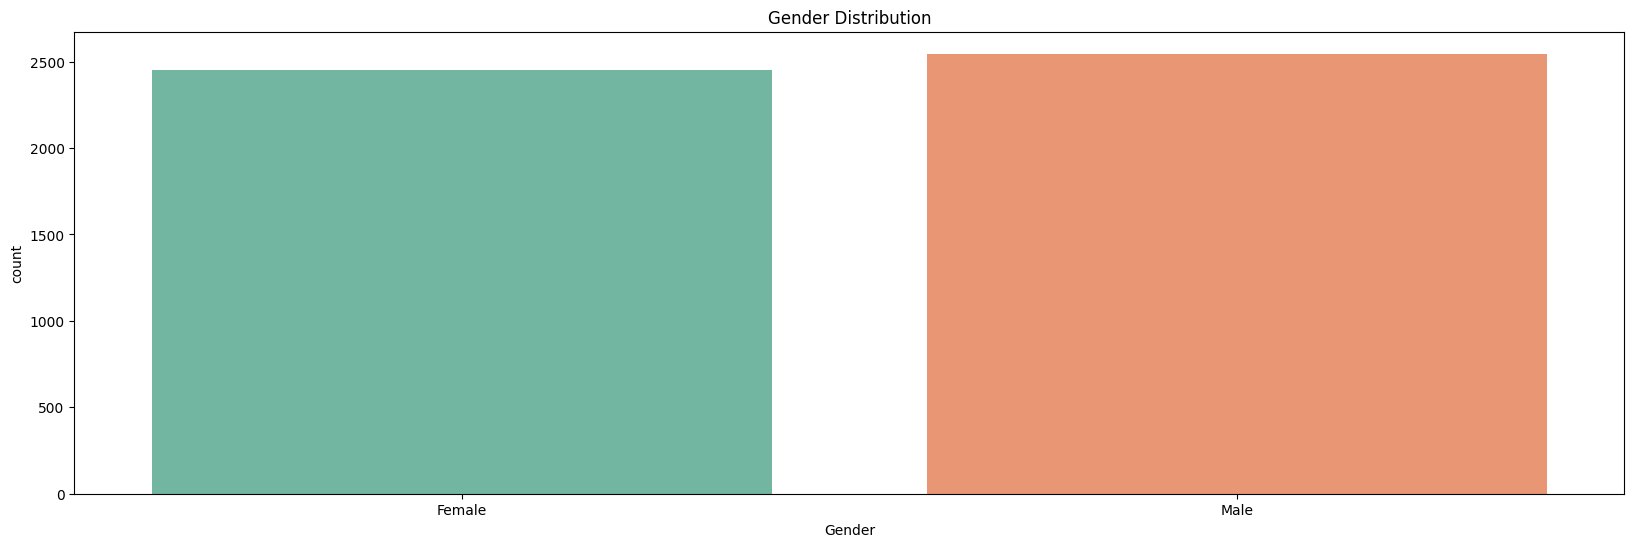

In [20]:
# Univariate Analysis on Categorical Columns
cat_cols = ["Married", "Education", "Gender"]
for cols in cat_cols:
  plt.figure(figsize = (20,6))
  sns.countplot(x=cols, data = new_df, palette = "Set2")
  plt.title(f"{cols} Distribution")
  plt.show()

/tmp/ipython-input-2737919517.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Approved', y=col, data=df, palette='coolwarm')


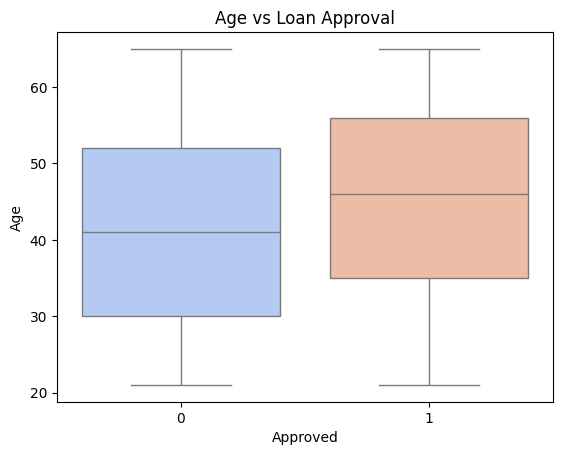

/tmp/ipython-input-2737919517.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Approved', y=col, data=df, palette='coolwarm')


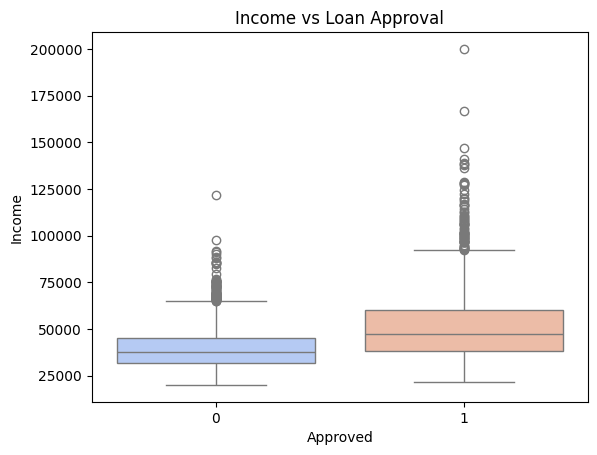

/tmp/ipython-input-2737919517.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Approved', y=col, data=df, palette='coolwarm')


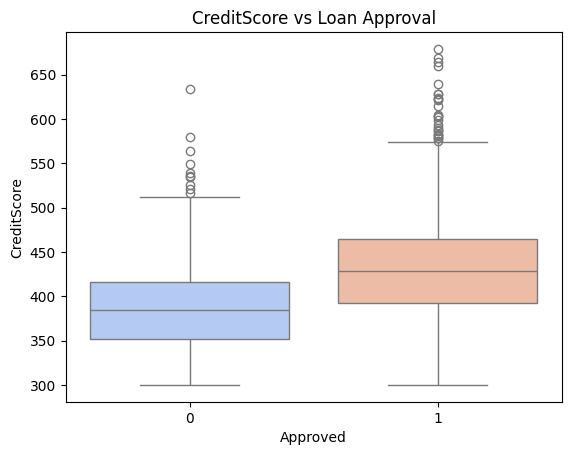

/tmp/ipython-input-2737919517.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Approved', y=col, data=df, palette='coolwarm')


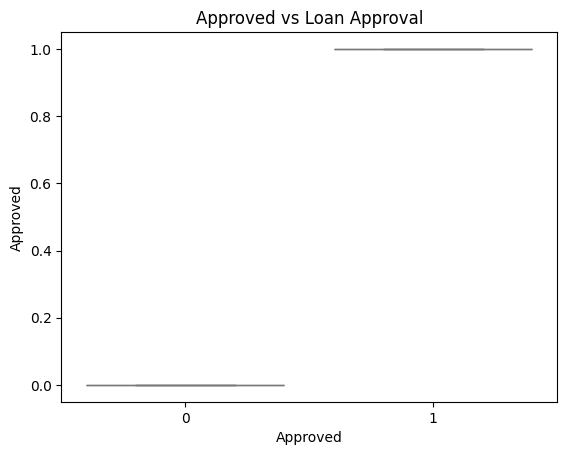

In [21]:
# Bivariate Analysis
for col in num_cols:
    sns.boxplot(x='Approved', y=col, data=df, palette='coolwarm')
    plt.title(f'{col} vs Loan Approval')
    plt.show()


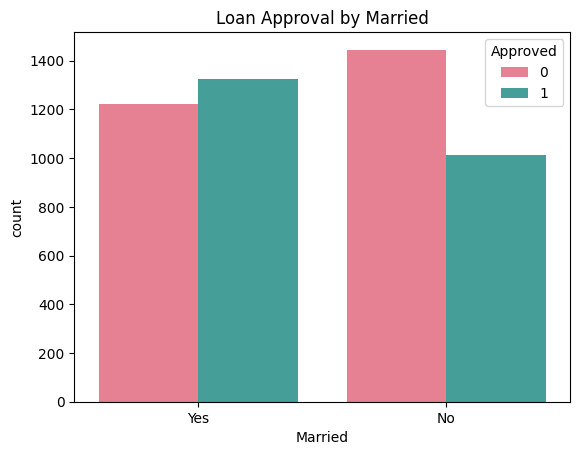

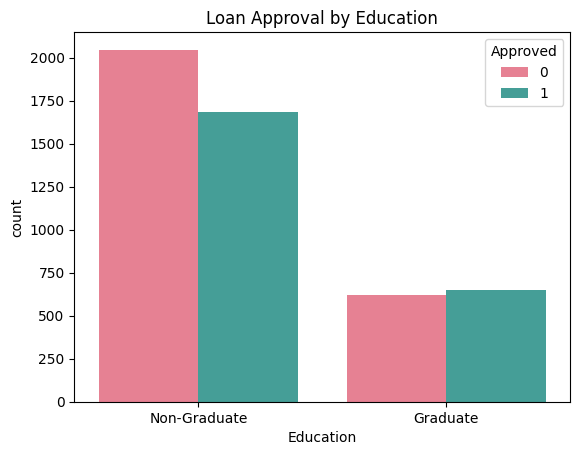

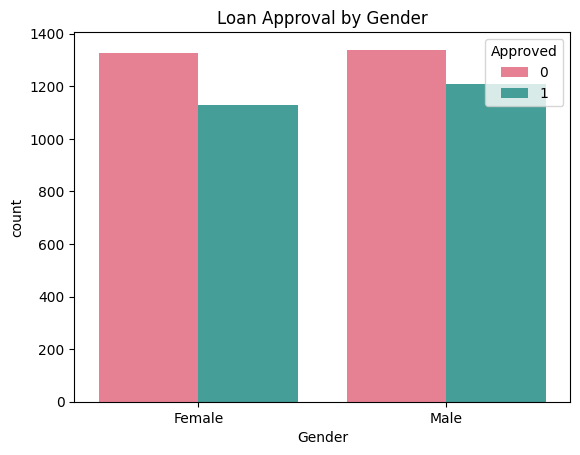

In [22]:
for col in ['Married', 'Education', 'Gender']:
    sns.countplot(x=col, hue='Approved', data=df, palette='husl')
    plt.title(f'Loan Approval by {col}')
    plt.show()


In [39]:
new_df.head(2)

,Age,Income,LoanAmount,CreditScore,Married,Education,Gender,Approved
0,59,82889,27000,498,Yes,Non-Graduate,Female,1
1,49,74192,42232,476,Yes,Graduate,Female,0


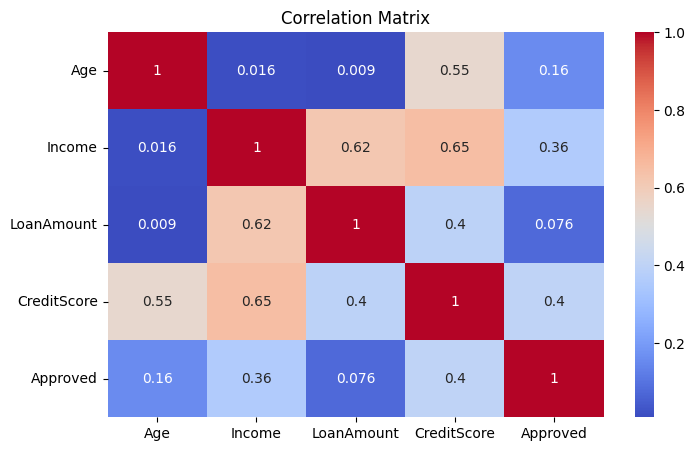

In [121]:
# Correlation
plt.figure(figsize=(8,5))
sns.heatmap(new_df.corr(numeric_only= True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**Observations:**



*  Credit Score and Loan approved has the highest correlation among all the features, which is 0.4.

*   income and Credit Score, Income and and Loan Amount has a moderate relation.



**4) Preprocessing + Pipeline Setup**

In [122]:
x = new_df.drop("Approved", axis = "columns")
y = new_df["Approved"]

numeric_features = ["Age", "Income", "LoanAmount", "CreditScore"]
categorical_features = ["Married", "Education", "Gender"]
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop = "first")

preprocessor = ColumnTransformer([
    ("num", numeric_transformer, numeric_features),
    ("cat", categorical_transformer, categorical_features)
])

**5) Build Pipeline with Logistic Regression**

In [123]:
pipeline = Pipeline(steps = [
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter = 500))
])

**6) Train Test Split**

In [124]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [125]:
print("size of X_train", X_train.shape)
print("size of X_test", X_test.shape)
print("size of Y_train", Y_train.shape)
print("size of Y_test", Y_test.shape)


size of X_train (3500, 7)
size of X_test (1500, 7)
size of Y_train (3500,)
size of Y_test (1500,)


**7) Training the Model**

In [126]:
pipeline.fit(X_train, Y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'Income',
                                                   'LoanAmount',
                                                   'CreditScore']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['Married', 'Education',
                                                   'Gender'])])),
                ('classifier', LogisticRegression(max_iter=500))])

In [127]:
Y_pred = pipeline.predict(X_test)

In [128]:
Y_pred

array([1, 1, 0, ..., 0, 1, 0])

In [130]:
print("\n--- Model Performance ---")
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, Y_pred))
print("\nClassification Report:\n", classification_report(Y_test, Y_pred))


--- Model Performance ---
Accuracy: 0.7186666666666667

Confusion Matrix:
 [[632 169]
 [253 446]]

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.79      0.75       801
           1       0.73      0.64      0.68       699

    accuracy                           0.72      1500
   macro avg       0.72      0.71      0.71      1500
weighted avg       0.72      0.72      0.72      1500



**Observation:**

The Accuracy of our model is around 72%, (will try to enhance it upto ~80 to ~85%)

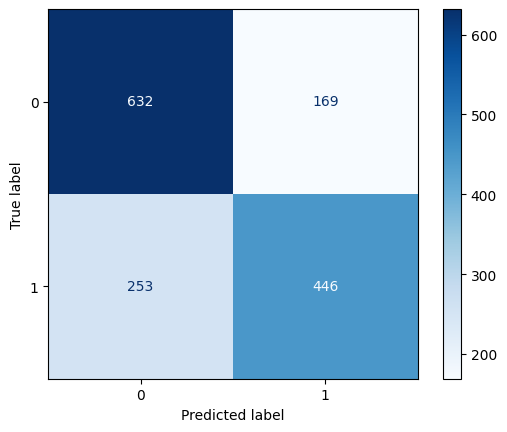

In [129]:
# 1Compute the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

# Display the matrix with class labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline.classes_)
disp.plot(cmap='Blues', values_format='d')

**Observation:**



*   632 times our model predicted 0 (not approved) when actually the loan wasn't approved.

*   253 times our model predicted 0 (approved) when actually the loan was approved.

*  446 times our model predicted 1 (approved) when actually the loan was approved.


*   169 times our model predicted 1 (approved) when actually the loan wasn't approved.



In [131]:
import joblib

# Save model
joblib.dump(model, "loan_prediction_model.pkl")


['loan_prediction_model.pkl']

In [132]:
import joblib

model = joblib.load("loan_prediction_model.pkl")
